In [25]:
import sys
import os
from pathlib import Path

# Lấy thư mục gốc project (giả sử notebook nằm trong folder 'notebook')
project_root = Path("/Users/danray/Github/CK_Python")
os.chdir(project_root)            # chuyển working directory về thư mục gốc
print(f"Current working directory: {os.getcwd()}")

# Thêm thư mục gốc vào sys.path để import Script
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

Current working directory: /Users/danray/Github/CK_Python


In [26]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
sys.path.append(os.getcwd())
from Script.DP import DataPreprocessor
from Script.LR import LogisticRegressionModel
from Script.SVM import SVMModel
from Script.RF import RandomForestModel
from Script.XGB import XGBoostModel
from Script.ModelSelector import ModelSelector
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Biểu đồ phân tích dữ liệu trước khi xử lý**

In [27]:
df = pd.read_csv('Data/heart_disease_uci.csv')
df.drop(columns=['id'], inplace=True)
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


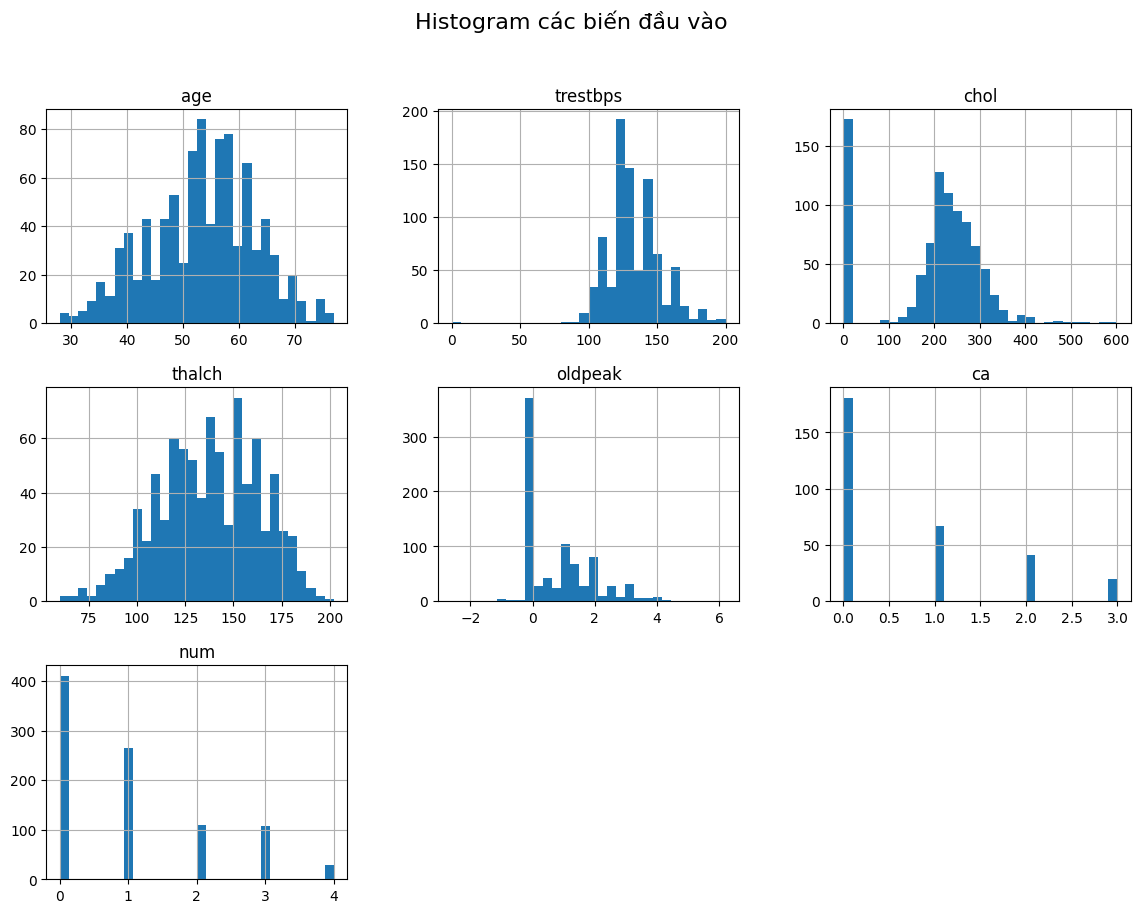

In [28]:
df.hist(figsize=(14,10), bins=30)
plt.suptitle("Histogram các biến đầu vào", fontsize=16)
plt.show()

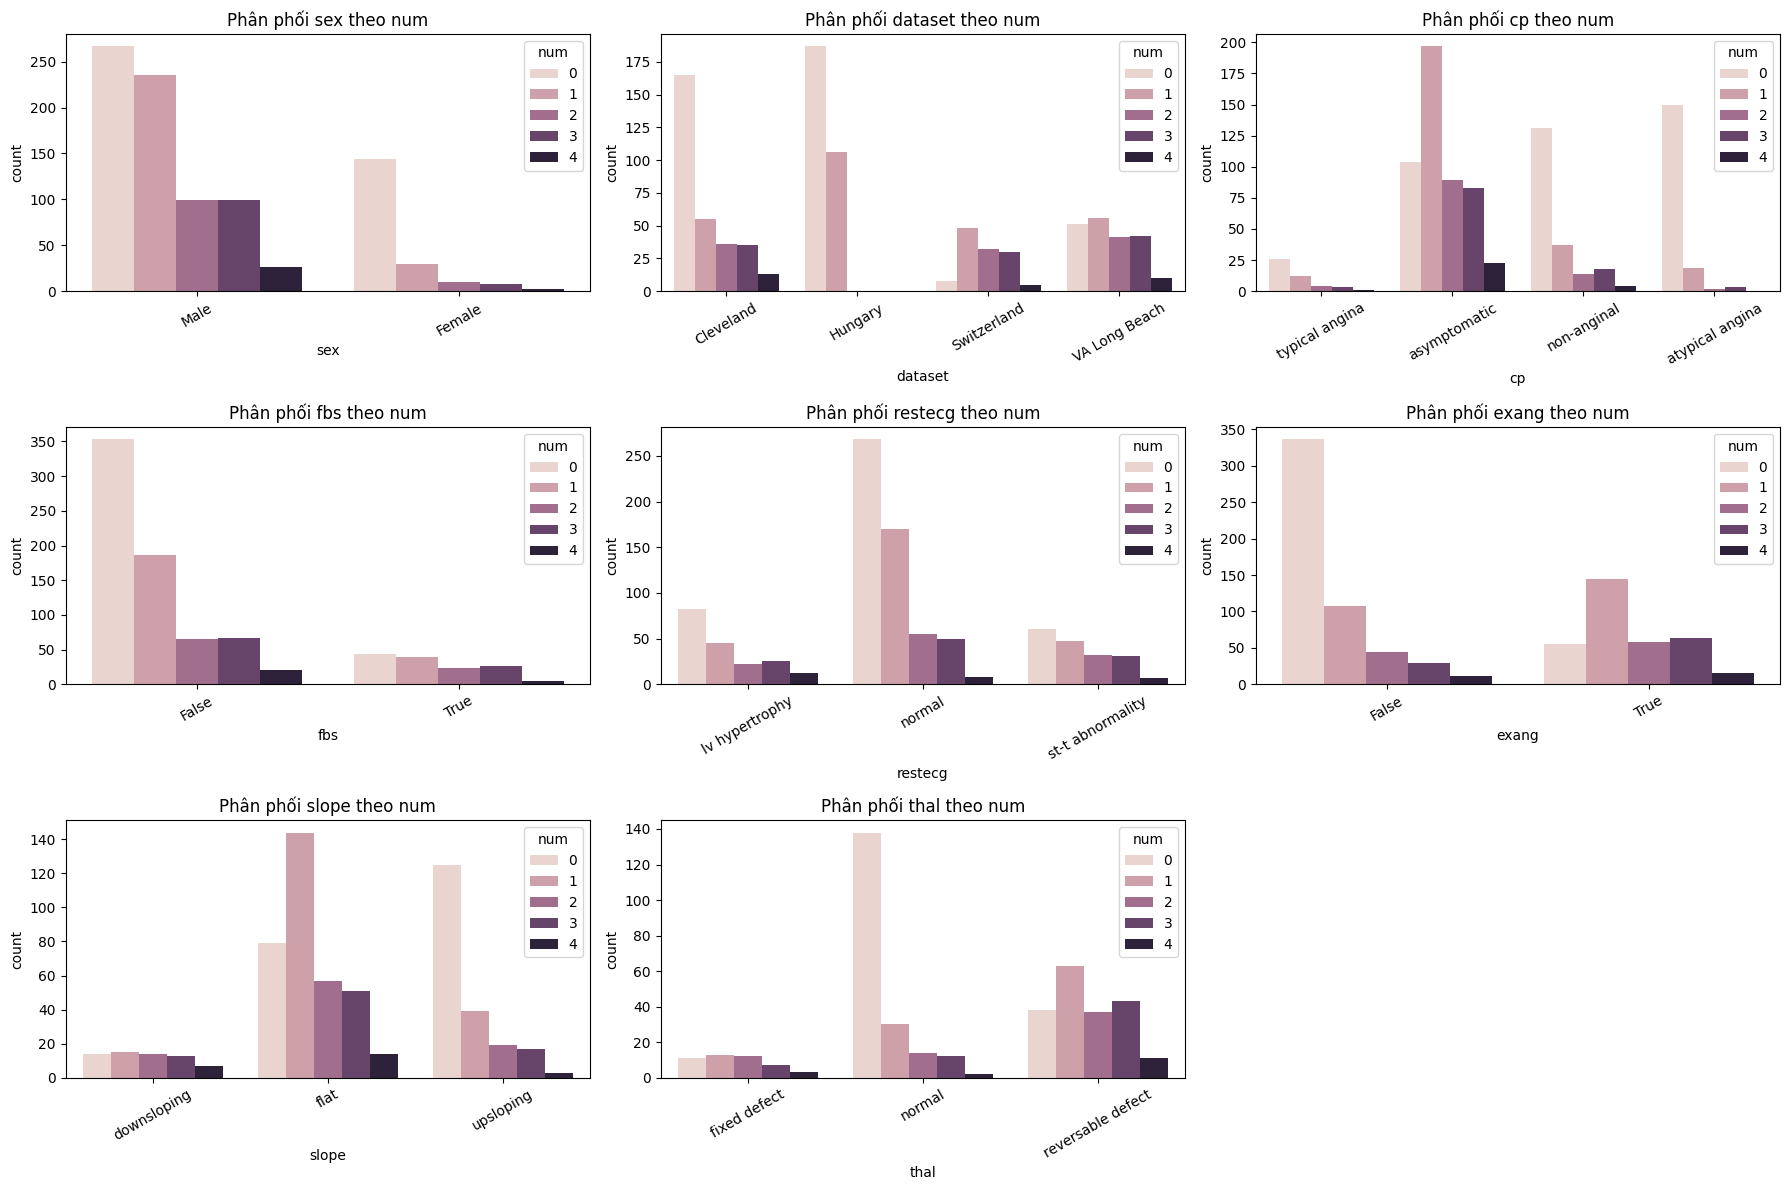

In [29]:
cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

n = len(cat_features)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(6 * cols, 4 * rows))

for i, col in enumerate(cat_features, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=col, hue='num')
    plt.title(f"Phân phối {col} theo num")
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

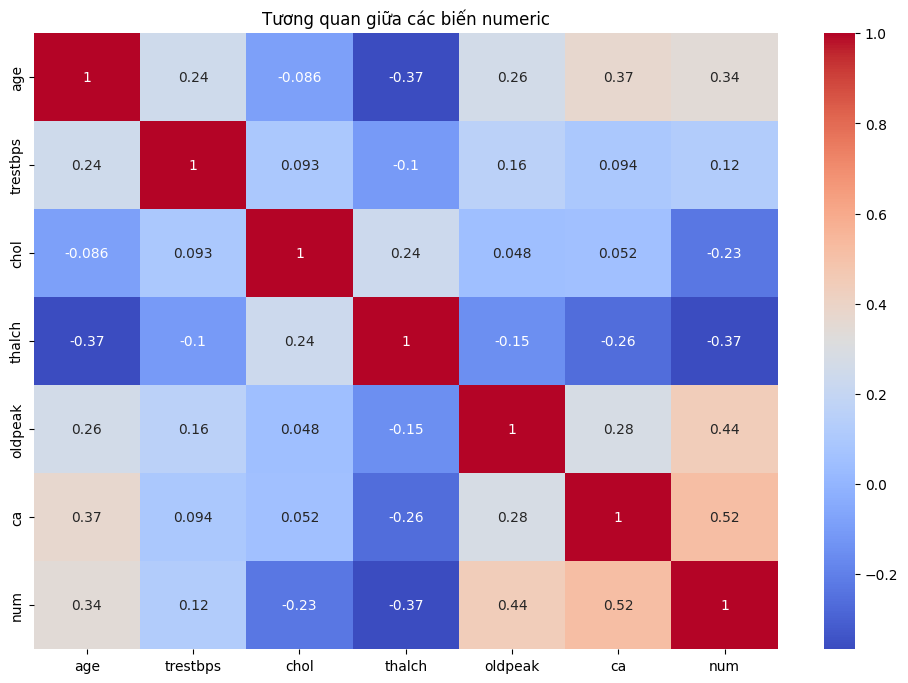

In [30]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Tương quan giữa các biến numeric")
plt.show()

In [31]:
processed_df = None
preprocessor = None

print("TIỀN XỬ LÍ DỮ LIỆU - HEART DISEASE DATASET")
print("=" * 70)

# Xử lí dữ liệu
try:
    input_file = "Data/heart_disease_uci.csv"
    # Khởi tạo và xử lý dữ liệu
    preprocessor_obj = DataPreprocessor(target_column='num', random_state=42)
    preprocessor_obj.load_data(input_file)
    processed_data = preprocessor_obj.auto_process_by_data_types()
    preprocessor_obj.save_processed_data('heart_disease_processed.csv')

    globals()['processed_df'] = processed_data
    globals()['preprocessor'] = preprocessor_obj
except Exception as e:
    print(f"\nLỗi: {e}")
    import traceback
    traceback.print_exc()
    sys.exit(1)

2025-12-10 00:12:08 - Script.DP - INFO - Đã xóa cột 'id'
2025-12-10 00:12:08 - Script.DP - INFO - Phát hiện - Numeric: 6, Categorical: 8, Datetime: 0
2025-12-10 00:12:08 - Script.DP - INFO - Đã load dữ liệu thành công: (920, 15)
2025-12-10 00:12:08 - Script.DP - INFO - Bắt đầu auto preprocessing pipeline...
2025-12-10 00:12:08 - Script.DP - INFO - Bắt đầu xử lí missing values...
2025-12-10 00:12:08 - Script.DP - INFO - Hoàn tất xử lí missing. Còn lại: 0
2025-12-10 00:12:09 - Script.DP - INFO - Tìm thấy 230 outliers
2025-12-10 00:12:09 - Script.DP - INFO - Bắt đầu quy trình phát hiện và xử lí outliers cho 6 cột số.
2025-12-10 00:12:09 - Script.DP - INFO - Hoàn tất phát hiện. Tìm thấy tổng cộng 230 outliers trong 5 cột.
2025-12-10 00:12:09 - Script.DP - INFO - Hoàn tất xử lí outliers tổng thể.
2025-12-10 00:12:09 - Script.DP - INFO - Label Encoding: 'sex' (2 values)
2025-12-10 00:12:09 - Script.DP - INFO - OneHot Encoding: 'dataset' (4 values -> 3 cols)
2025-12-10 00:12:09 - Script.DP - 

TIỀN XỬ LÍ DỮ LIỆU - HEART DISEASE DATASET


In [32]:
# Giả sử df đã chuẩn hóa và target là cột "num"
X = processed_data.drop(columns=["num"])
y = (processed_data["num"] > 0).astype(int)

# Danh sách các model
models = [
    LogisticRegressionModel(X=X, y=y, C=1.0, penalty="l2", max_iter=1000),
    SVMModel(X=X, y=y, C=1.0, kernel="rbf", probability=True),
    RandomForestModel(X=X, y=y, n_estimators=100, max_depth=None),
    XGBoostModel(X=X, y=y, n_estimators=100, learning_rate=0.1, max_depth=6)
]

# Các siêu tham số muốn tối ưu cho mỗi model (nếu muốn)
param_grids = {
    "LogisticRegression": {"C": [0.01, 0.1, 1, 10], "penalty": ["l2"], "max_iter":[500,1000]},
    "SVM": {"C": [0.1, 1, 10], "gamma": ["scale","auto"], "kernel": ["rbf"]},
    "RandomForest": {"n_estimators": [50,100,200], "max_depth": [None,5,10]},
    "XGBoost": {"n_estimators": [50,100,200], "learning_rate": [0.01,0.1,0.2], "max_depth":[3,6,9]}
}

save_folder = "models_all/"
# Fit, optimize, Save và đánh giá từng model
for model in models:
    print(f"--- {model.name} ---")
    path = f"{save_folder}{model.get_name()}.pkl"

    model.split_data()
    # Tối ưu siêu tham số nếu có param_grid
    if model.name in param_grids:
        print("Optimizing hyperparameters...")
        best = model.optimize_params(
            param_grid=param_grids[model.name],
            search="grid",
            cv=3,
            scoring="recall",   # ưu tiên recall cho bệnh tim
            n_jobs=-1,
            verbose=1
        )

    # Fit model (sẽ dùng _model đã tối ưu)
    model.fit()

    # Lưu model
    model.save_model(path)

    # Đánh giá metrics trên tập validation/test
    metric = model.evaluate()
    cv_score = model.cross_validate(cv = 5, scoring = "recall")

    print("Metrics:")
    for k, v in metric.items():
        print("\t", k, ":", v)

    print("CV scores:")
    for k, v in cv_score.items():
        print("\t", k, ":", v)

    model.print_summary()
    print("\n\n")

2025-12-10 00:12:09 - Script.model - INFO - [LogisticRegression] Chia dữ liệu hoàn tất: Kích thước tập train=644, Kích thước tập test=276
2025-12-10 00:12:09 - Script.model - INFO - [LogisticRegression] Bắt đầu tối ưu siêu tham số sử dụng phương pháp GRID...
2025-12-10 00:12:09 - Script.model - INFO - [LogisticRegression] Danh sách tham số: {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'max_iter': [500, 1000]}


--- LogisticRegression ---
Optimizing hyperparameters...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


2025-12-10 00:12:10 - Script.model - INFO - [LogisticRegression] Tối ưu hoàn tất!
2025-12-10 00:12:10 - Script.model - INFO - [LogisticRegression] Tham số tốt nhất: {'C': 0.01, 'max_iter': 500, 'penalty': 'l2'}
2025-12-10 00:12:10 - Script.model - INFO - [LogisticRegression] Điểm CV tốt nhất (recall): 0.8904
2025-12-10 00:12:10 - Script.model - INFO - [LogisticRegression] Bắt đầu huấn luyện mô hình...
2025-12-10 00:12:10 - Script.model - INFO - [LogisticRegression] Huấn luyện hoàn tất thành công lúc 2025-12-10 00:12:10.845495
2025-12-10 00:12:10 - Script.model - INFO - [LogisticRegression] Lưu mô hình thành công vào models_all/LogisticRegression.pkl
2025-12-10 00:12:10 - Script.model - INFO - [LogisticRegression] Chạy cross-validation với 5 fold...
2025-12-10 00:12:10 - Script.model - INFO - [LogisticRegression] Điểm CV: [0.83168317 0.54901961 0.84313725 0.91176471 0.98039216]
2025-12-10 00:12:10 - Script.model - INFO - [LogisticRegression] Trung bình CV: 0.8232 (+/- 0.1471)
2025-12-10

Metrics:
	 accuracy : 0.8152173913043478
	 precision : 0.8355263157894737
	 recall : 0.8300653594771242
	 f1 : 0.8327868852459016
	 roc_auc : 0.9006323396567298
CV scores:
	 cv_scores : [0.8316831683168316, 0.5490196078431373, 0.8431372549019608, 0.9117647058823529, 0.9803921568627451]
	 cv_mean : 0.8231993787614055
	 cv_std : 0.1471036553089476
Các thông tin về mô hình
name : LogisticRegression
is_fitted : True
model_params :
	 C : 0.01
	 class_weight : None
	 dual : False
	 fit_intercept : True
	 intercept_scaling : 1
	 l1_ratio : None
	 max_iter : 500
	 multi_class : deprecated
	 n_jobs : None
	 penalty : l2
	 random_state : 42
	 solver : lbfgs
	 tol : 0.0001
	 verbose : 0
	 warm_start : False
created_at : 2025-12-10 00:12:09.108371
trained_at : 2025-12-10 00:12:10.845495
best_params : {'C': 0.01, 'max_iter': 500, 'penalty': 'l2'}
best_score : 0.8903764895788825



--- SVM ---
Optimizing hyperparameters...
Fitting 3 folds for each of 6 candidates, totalling 18 fits


2025-12-10 00:12:11 - Script.model - INFO - [SVM] Huấn luyện hoàn tất thành công lúc 2025-12-10 00:12:11.103095
2025-12-10 00:12:11 - Script.model - INFO - [SVM] Lưu mô hình thành công vào models_all/SVM.pkl
2025-12-10 00:12:11 - Script.model - INFO - [SVM] Chạy cross-validation với 5 fold...
2025-12-10 00:12:11 - Script.model - INFO - [SVM] Điểm CV: [0.91089109 0.62745098 0.92156863 1.         0.99019608]
2025-12-10 00:12:11 - Script.model - INFO - [SVM] Trung bình CV: 0.8900 (+/- 0.1360)
2025-12-10 00:12:11 - Script.model - INFO - [RandomForest] Chia dữ liệu hoàn tất: Kích thước tập train=644, Kích thước tập test=276
2025-12-10 00:12:11 - Script.model - INFO - [RandomForest] Bắt đầu tối ưu siêu tham số sử dụng phương pháp GRID...
2025-12-10 00:12:11 - Script.model - INFO - [RandomForest] Danh sách tham số: {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}


Metrics:
	 accuracy : 0.8115942028985508
	 precision : 0.791907514450867
	 recall : 0.8954248366013072
	 f1 : 0.8404907975460123
	 roc_auc : 0.9041394335511982
CV scores:
	 cv_scores : [0.9108910891089109, 0.6274509803921569, 0.9215686274509803, 1.0, 0.9901960784313726]
	 cv_mean : 0.8900213550766841
	 cv_std : 0.13601783367864972
Các thông tin về mô hình
name : SVM
is_fitted : True
model_params :
	 C : 0.1
	 break_ties : False
	 cache_size : 200
	 class_weight : None
	 coef0 : 0.0
	 decision_function_shape : ovr
	 degree : 3
	 gamma : scale
	 kernel : rbf
	 max_iter : -1
	 probability : True
	 random_state : 42
	 shrinking : True
	 tol : 0.001
	 verbose : False
created_at : 2025-12-10 00:12:09.108395
trained_at : 2025-12-10 00:12:11.103095
best_params : {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
best_score : 0.9297583440155724



--- RandomForest ---
Optimizing hyperparameters...
Fitting 3 folds for each of 9 candidates, totalling 27 fits


2025-12-10 00:12:11 - Script.model - INFO - [RandomForest] Tối ưu hoàn tất!
2025-12-10 00:12:11 - Script.model - INFO - [RandomForest] Tham số tốt nhất: {'max_depth': 5, 'n_estimators': 100}
2025-12-10 00:12:11 - Script.model - INFO - [RandomForest] Điểm CV tốt nhất (recall): 0.8762
2025-12-10 00:12:11 - Script.model - INFO - [RandomForest] Bắt đầu huấn luyện mô hình...
2025-12-10 00:12:11 - Script.model - INFO - [RandomForest] Huấn luyện hoàn tất thành công lúc 2025-12-10 00:12:11.977370
2025-12-10 00:12:11 - Script.model - INFO - [RandomForest] Lưu mô hình thành công vào models_all/RandomForest.pkl
2025-12-10 00:12:11 - Script.model - INFO - [RandomForest] Chạy cross-validation với 5 fold...
2025-12-10 00:12:12 - Script.model - INFO - [RandomForest] Điểm CV: [0.74257426 0.57843137 0.85294118 0.95098039 0.98039216]
2025-12-10 00:12:12 - Script.model - INFO - [RandomForest] Trung bình CV: 0.8211 (+/- 0.1472)
2025-12-10 00:12:12 - Script.model - INFO - [XGBoost] Chia dữ liệu hoàn tất: K

Metrics:
	 accuracy : 0.8333333333333334
	 precision : 0.8364779874213837
	 recall : 0.869281045751634
	 f1 : 0.8525641025641025
	 roc_auc : 0.8954248366013071
CV scores:
	 cv_scores : [0.7425742574257426, 0.5784313725490197, 0.8529411764705882, 0.9509803921568627, 0.9803921568627451]
	 cv_mean : 0.8210638710929917
	 cv_std : 0.1471809202941255
Các thông tin về mô hình
name : RandomForest
is_fitted : True
model_params :
	 bootstrap : True
	 ccp_alpha : 0.0
	 class_weight : None
	 criterion : gini
	 max_depth : 5
	 max_features : sqrt
	 max_leaf_nodes : None
	 max_samples : None
	 min_impurity_decrease : 0.0
	 min_samples_leaf : 1
	 min_samples_split : 2
	 min_weight_fraction_leaf : 0.0
	 monotonic_cst : None
	 n_estimators : 100
	 n_jobs : None
	 oob_score : False
	 random_state : 42
	 verbose : 0
	 warm_start : False
created_at : 2025-12-10 00:12:09.108406
trained_at : 2025-12-10 00:12:11.977370
best_params : {'max_depth': 5, 'n_estimators': 100}
best_score : 0.876204719175806



--- 

2025-12-10 00:12:12 - Script.model - INFO - [XGBoost] Tối ưu hoàn tất!
2025-12-10 00:12:12 - Script.model - INFO - [XGBoost] Tham số tốt nhất: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 50}
2025-12-10 00:12:12 - Script.model - INFO - [XGBoost] Điểm CV tốt nhất (recall): 0.8612
2025-12-10 00:12:12 - Script.model - INFO - [XGBoost] Bắt đầu huấn luyện mô hình...
2025-12-10 00:12:12 - Script.model - INFO - [XGBoost] Huấn luyện hoàn tất thành công lúc 2025-12-10 00:12:12.607000
2025-12-10 00:12:12 - Script.model - INFO - [XGBoost] Lưu mô hình thành công vào models_all/XGBoost.pkl
2025-12-10 00:12:12 - Script.model - INFO - [XGBoost] Chạy cross-validation với 5 fold...
2025-12-10 00:12:12 - Script.model - INFO - [XGBoost] Điểm CV: [0.8902439  0.8245614  0.81967213 0.53529412 0.5323741 ]
2025-12-10 00:12:12 - Script.model - INFO - [XGBoost] Trung bình CV: 0.7204 (+/- 0.1544)


Metrics:
	 accuracy : 0.8007246376811594
	 precision : 0.7987804878048781
	 recall : 0.8562091503267973
	 f1 : 0.8264984227129337
	 roc_auc : 0.8796429140761997
CV scores:
	 cv_scores : [0.8902439024390244, 0.8245614035087719, 0.819672131147541, 0.5352941176470588, 0.5323741007194245]
	 cv_mean : 0.7204291310923642
	 cv_std : 0.1543822706388502
Các thông tin về mô hình
name : XGBoost
is_fitted : True
model_params :
	 objective : binary:logistic
	 base_score : None
	 booster : None
	 callbacks : None
	 colsample_bylevel : None
	 colsample_bynode : None
	 colsample_bytree : None
	 device : None
	 early_stopping_rounds : None
	 enable_categorical : False
	 eval_metric : logloss
	 feature_types : None
	 gamma : None
	 grow_policy : None
	 importance_type : None
	 interaction_constraints : None
	 learning_rate : 0.01
	 max_bin : None
	 max_cat_threshold : None
	 max_cat_to_onehot : None
	 max_delta_step : None
	 max_depth : 6
	 max_leaves : None
	 min_child_weight : None
	 missing : nan
	 m

In [33]:
# load mô hình
loaded_models = {}
for model in models:
    path = f"{save_folder}{model.get_name()}.pkl"
    loaded_model = type(model).load_model(path)  # tạo instance mới từ class của model gốc
    loaded_models[model.get_name()] = loaded_model
    print(f"Loaded {model.get_name()} from {path}")

Loaded LogisticRegression from models_all/LogisticRegression.pkl
Loaded SVM from models_all/SVM.pkl
Loaded RandomForest from models_all/RandomForest.pkl
Loaded XGBoost from models_all/XGBoost.pkl


In [34]:
# lập metric để so sánh với trường hợp không tối ưu siêu tham số

# model_not_optimal là models ở cell trên
models_not_optimal = [
    LogisticRegressionModel(X=X, y=y, C=1.0, penalty="l2", max_iter=1000),
    SVMModel(X=X, y=y, C=1.0, kernel="rbf", probability=True),
    RandomForestModel(X=X, y=y, n_estimators=100, max_depth=None),
    XGBoostModel(X=X, y=y, n_estimators=100, learning_rate=0.1, max_depth=6)
]

all_model_metrics = {}

for model in models_not_optimal:
    name = model.get_name()

    # Các random state đều bằng 42 nên sẽ không gây ra sai lệch do ngẫu nhiên
    model.fit()
    metric_not_optimal = model.evaluate()

    # Random state bằng 42 nên sẽ không ảnh hưởng
    loaded_models[name].split_data(X= X, y = y)
    metric_optimal = loaded_models[name].evaluate()

    all_model_metrics[name] = {
        "Trước Khi tối ưu siêu tham số": metric_not_optimal,
        "Sau khi tối ưu siêu tham số": metric_optimal
    }


2025-12-10 00:12:12 - Script.model - INFO - [LogisticRegression] Chia dữ liệu hoàn tất: Kích thước tập train=644, Kích thước tập test=276
2025-12-10 00:12:12 - Script.model - INFO - [LogisticRegression] Bắt đầu huấn luyện mô hình...
2025-12-10 00:12:12 - Script.model - INFO - [LogisticRegression] Huấn luyện hoàn tất thành công lúc 2025-12-10 00:12:12.781449
2025-12-10 00:12:12 - Script.model - INFO - [LogisticRegression] Chia dữ liệu hoàn tất: Kích thước tập train=644, Kích thước tập test=276
2025-12-10 00:12:12 - Script.model - INFO - [SVM] Chia dữ liệu hoàn tất: Kích thước tập train=644, Kích thước tập test=276
2025-12-10 00:12:12 - Script.model - INFO - [SVM] Bắt đầu huấn luyện mô hình...
2025-12-10 00:12:12 - Script.model - INFO - [SVM] Huấn luyện hoàn tất thành công lúc 2025-12-10 00:12:12.813914
2025-12-10 00:12:12 - Script.model - INFO - [SVM] Chia dữ liệu hoàn tất: Kích thước tập train=644, Kích thước tập test=276
2025-12-10 00:12:12 - Script.model - INFO - [RandomForest] Chia 

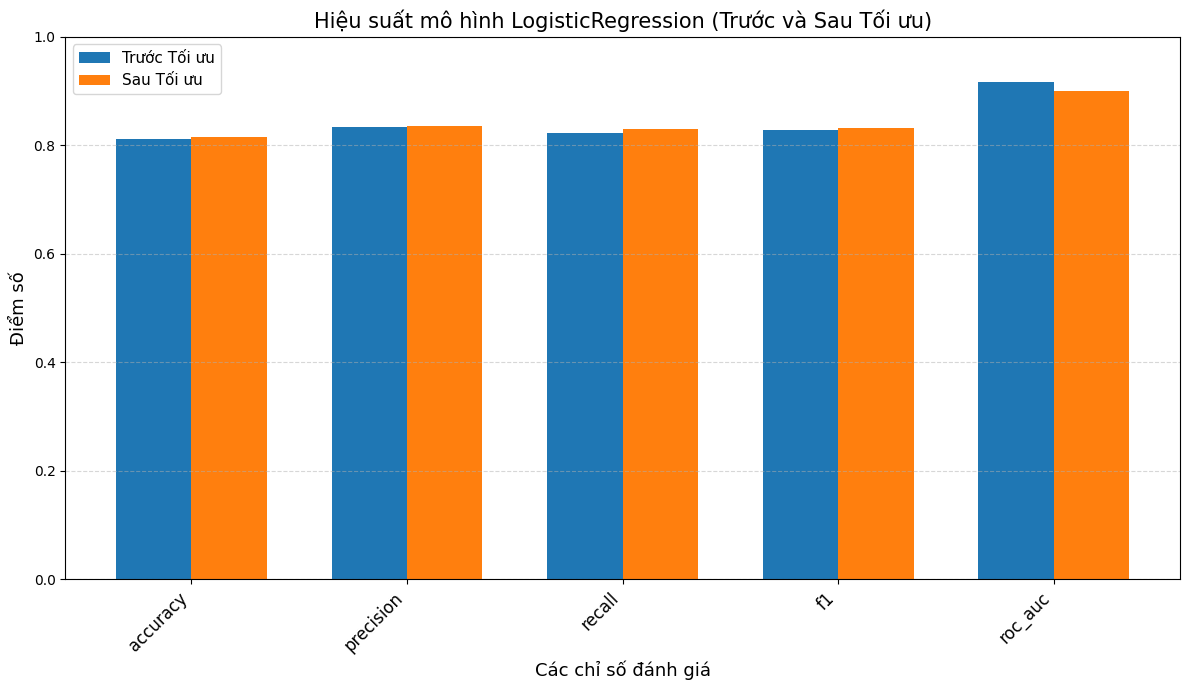

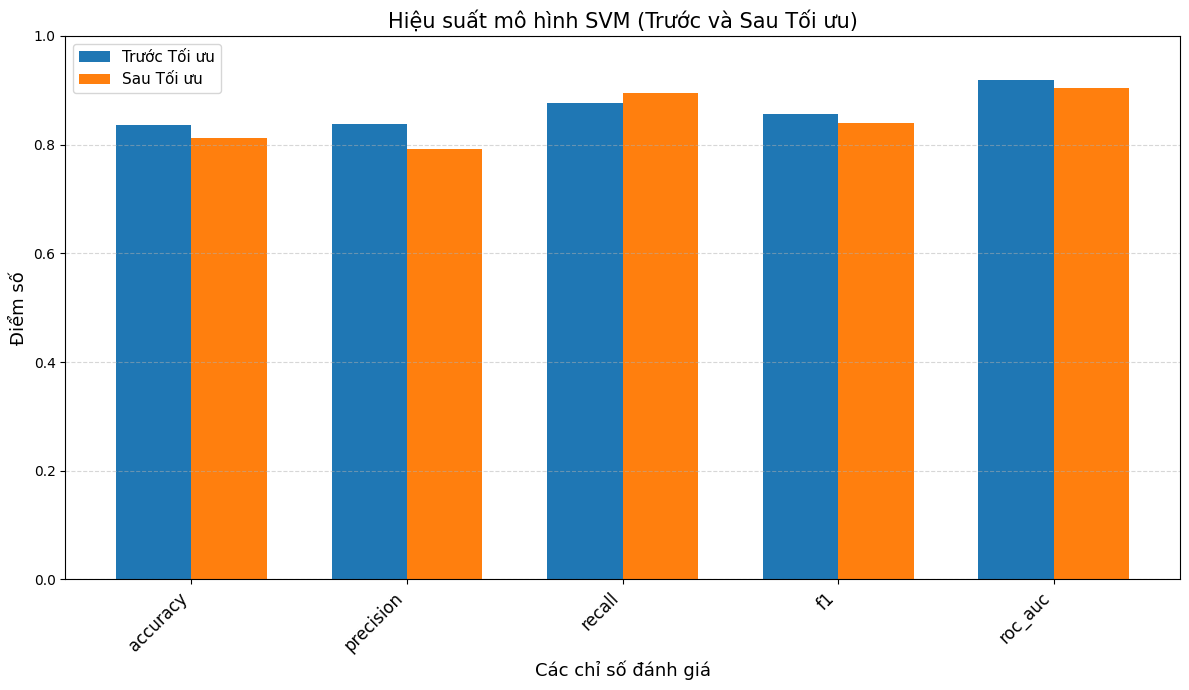

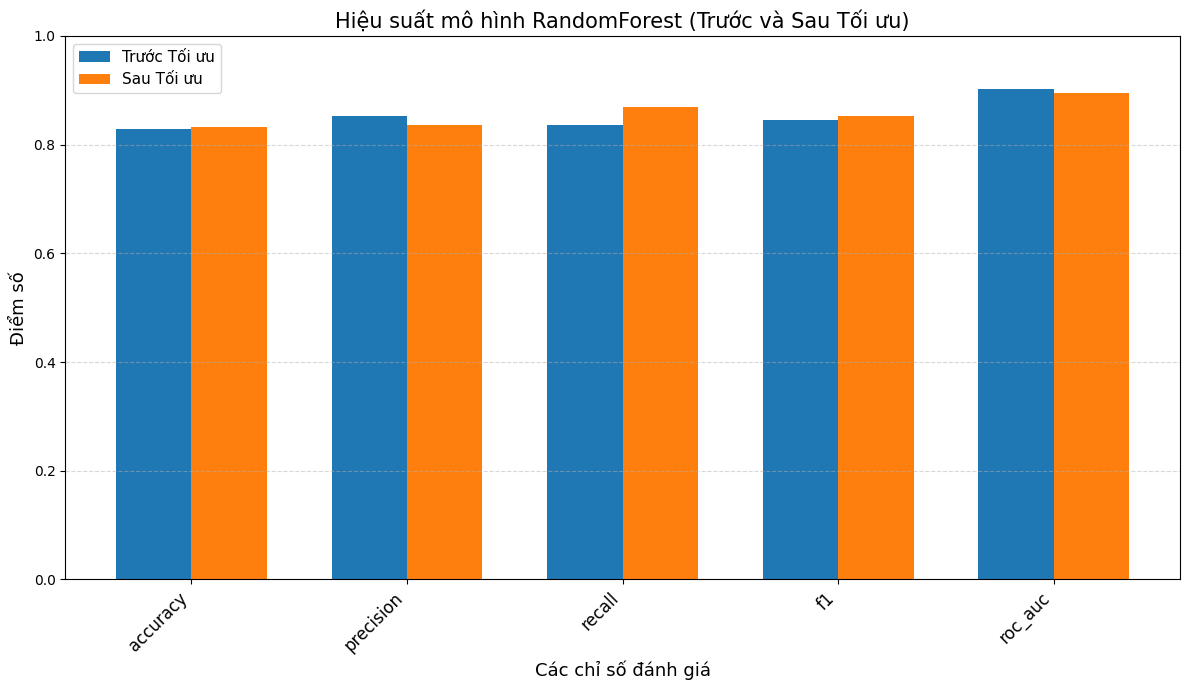

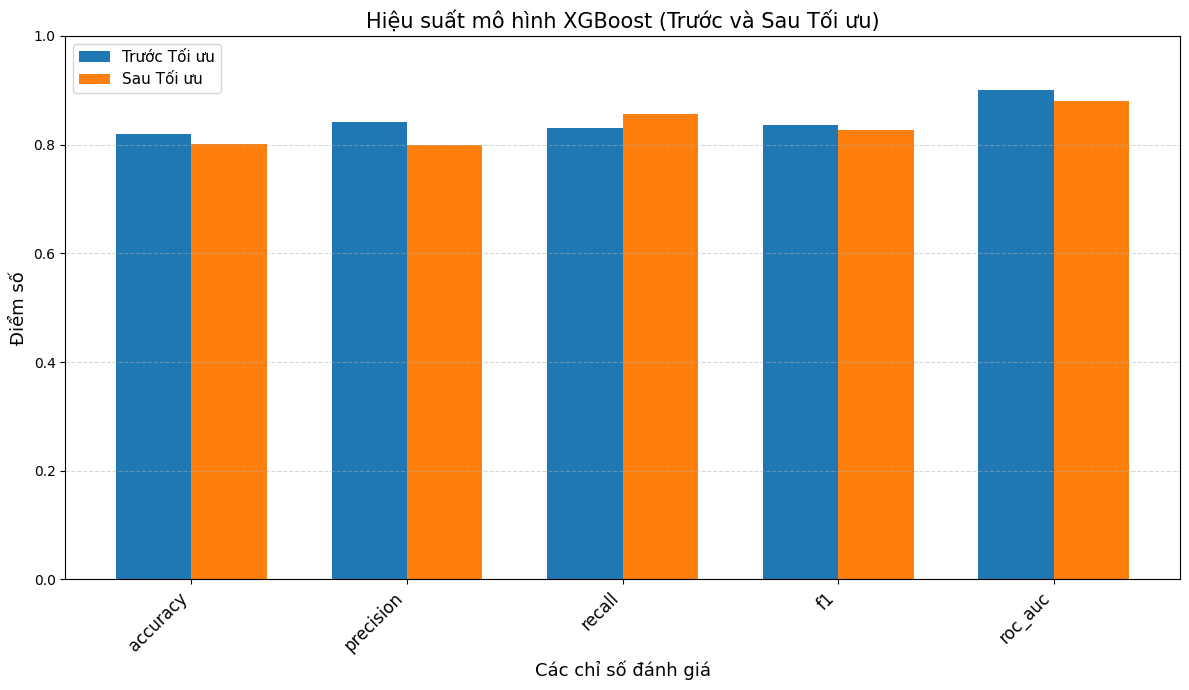

In [35]:
for model_name, metrics_data in all_model_metrics.items():
    metric_before = metrics_data['Trước Khi tối ưu siêu tham số']
    metric_after = metrics_data['Sau khi tối ưu siêu tham số']

    metrics = list(metric_before.keys())
    before_values = list(metric_before.values())
    after_values = list(metric_after.values())

    x = np.arange(len(metrics))
    width = 0.35

    plt.figure(figsize=(12, 7))
    plt.bar(x - width/2, before_values, width, label="Trước Tối ưu")
    plt.bar(x + width/2, after_values, width, label="Sau Tối ưu")

    plt.xticks(x, metrics, fontsize=12, rotation=45, ha='right')
    plt.xlabel("Các chỉ số đánh giá", fontsize=13)
    plt.ylabel("Điểm số", fontsize=13)

    plt.title(f"Hiệu suất mô hình {model_name} (Trước và Sau Tối ưu)", fontsize=15) # Tiêu đề

    plt.legend(fontsize=11)
    plt.ylim(0, 1)  # vì metrics từ 0 → 1

    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout() # Điều chỉnh layout để tránh cắt xén nhãn
    plt.show()

In [36]:
test = ModelSelector(models=models, metric='recall') #Sử dụng recall để chuẩn đoán đúng nhiều người có bệnh nhất và đồng thời tránh bỏ sót người bệnh
test.print_result()

# Sử dụng khi cần lấy model tốt nhất
best_model = test.get_best_model()[0]["model"]
best_model

Metric được chọn: recall
tên mô hình: SVM .
 Chỉ số:  0.8954248366013072
tên mô hình: RandomForest .
 Chỉ số:  0.869281045751634
tên mô hình: XGBoost .
 Chỉ số:  0.8562091503267973
tên mô hình: LogisticRegression .
 Chỉ số:  0.8300653594771242
Mô hình tốt nhất là: 
  SVM => 0.8954248366013072


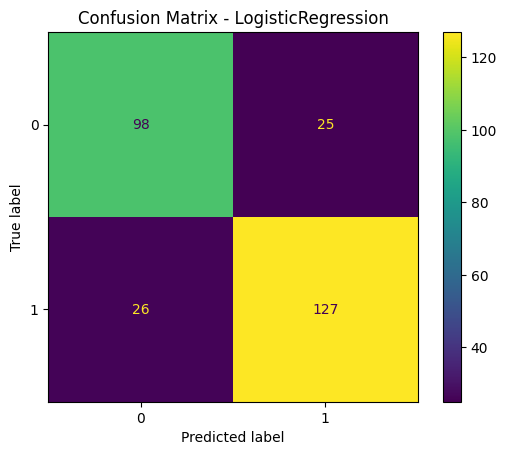

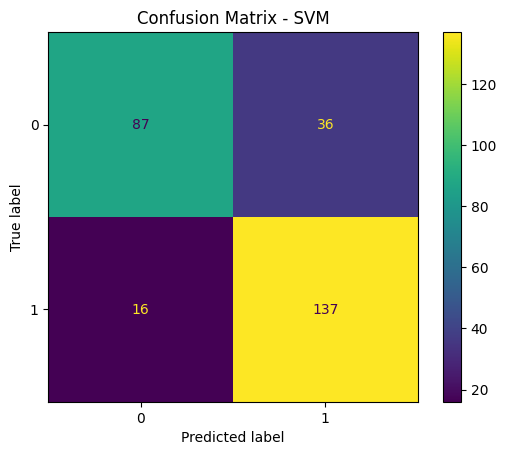

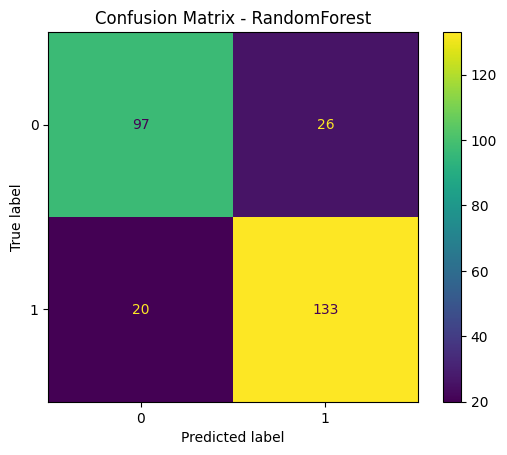

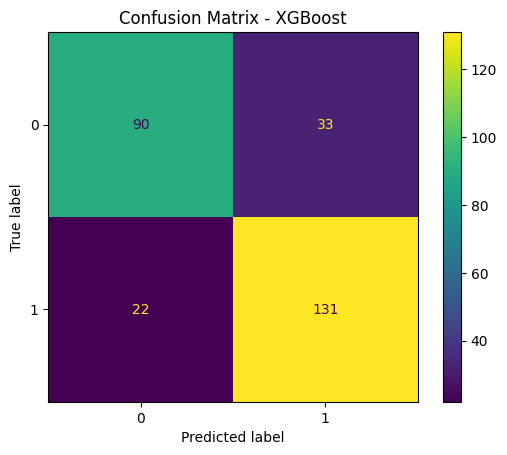

In [37]:
for i in range(4):
    models[i].plot_confusion_matrix()

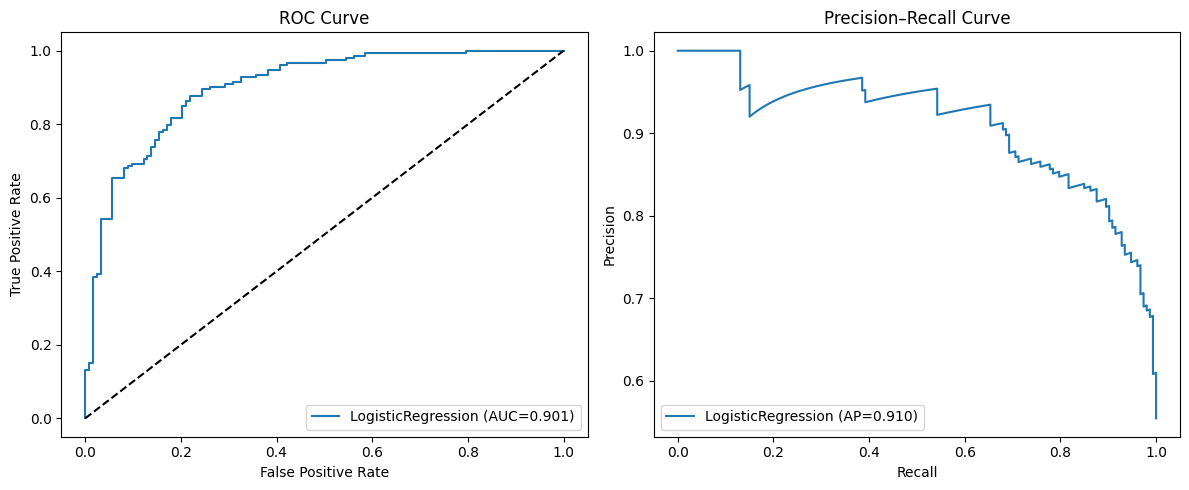

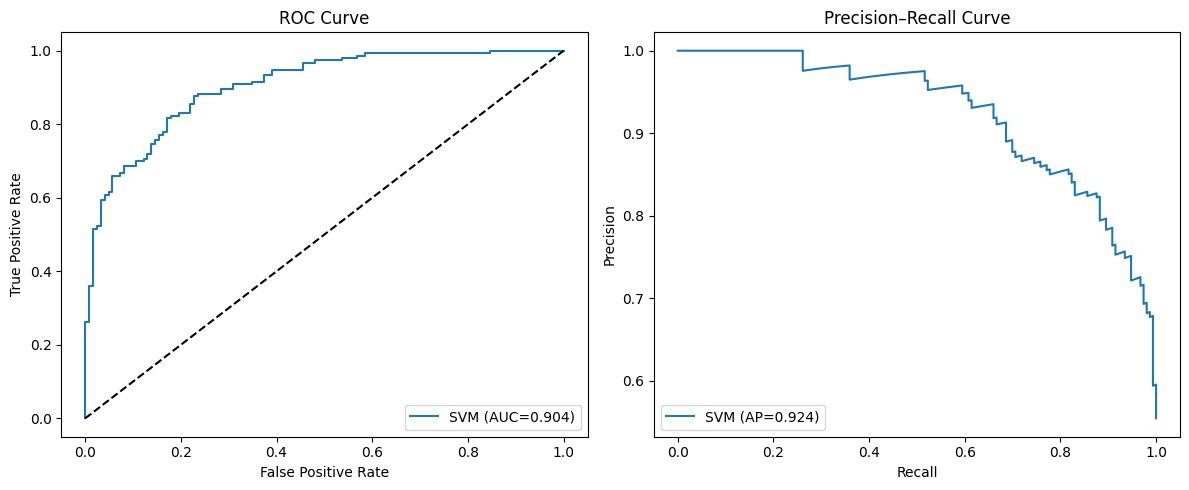

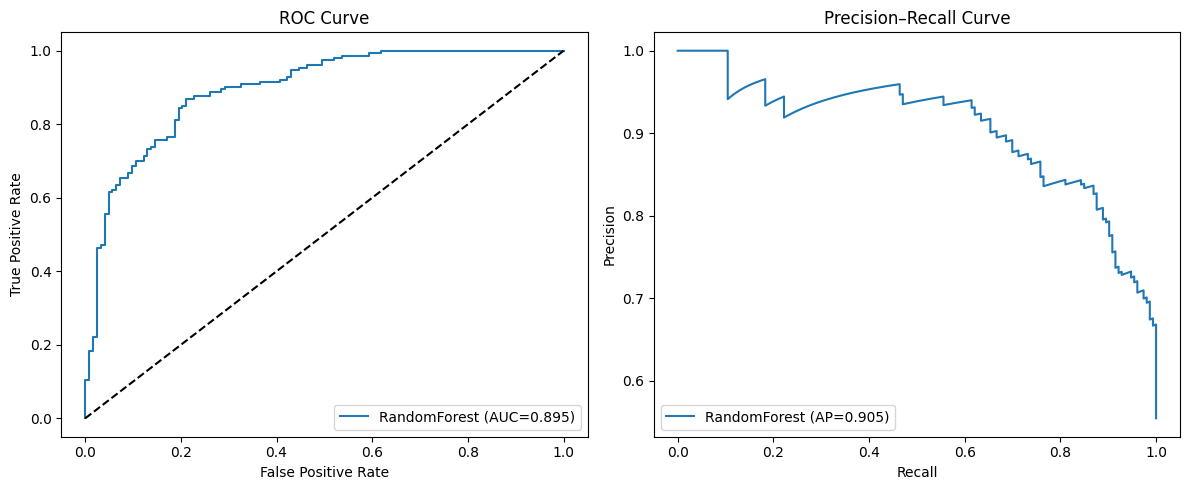

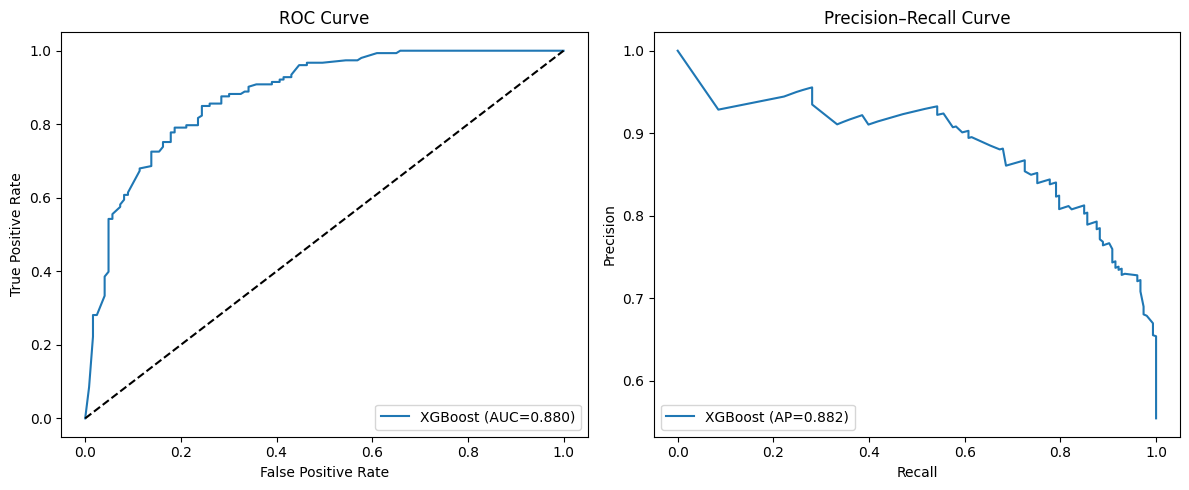

In [38]:
for i in range(4):
    models[i].plot_roc_pr()

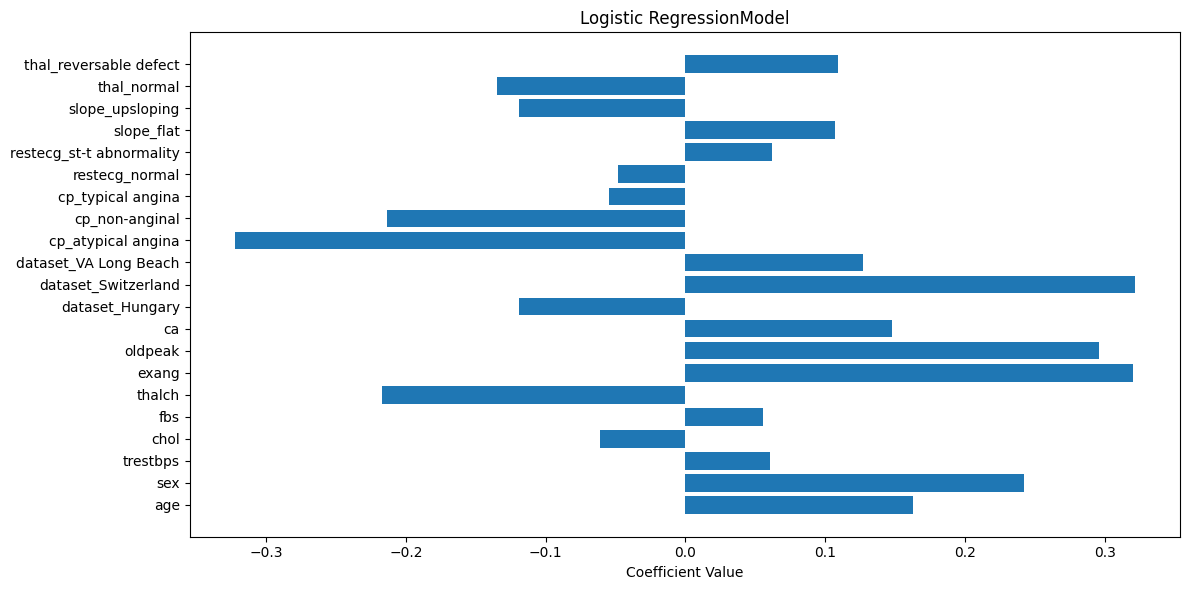

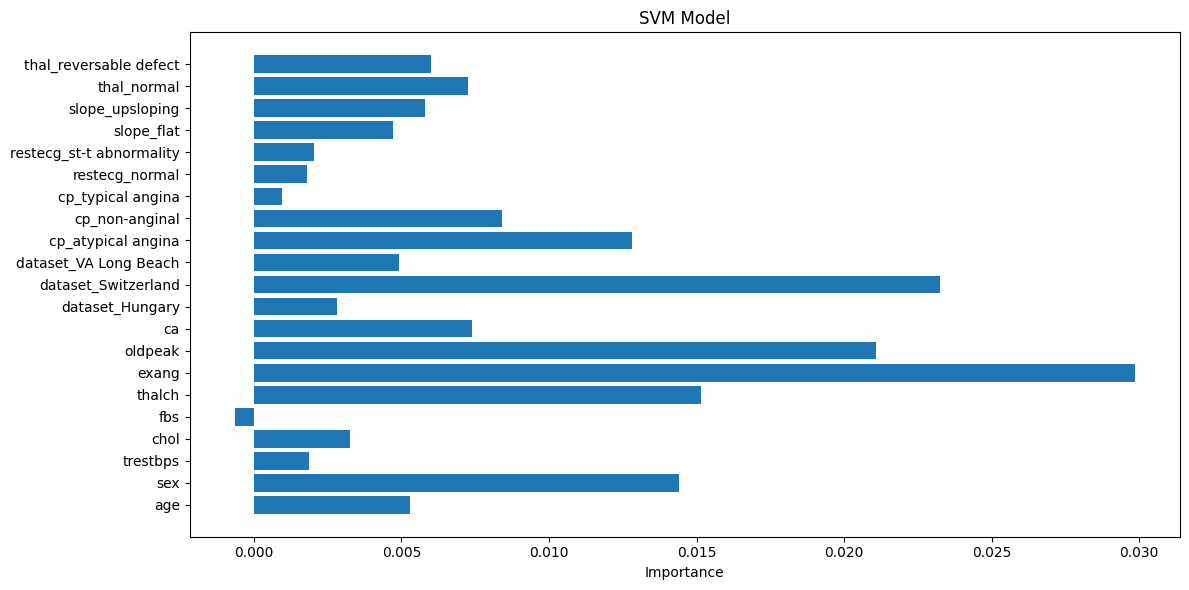

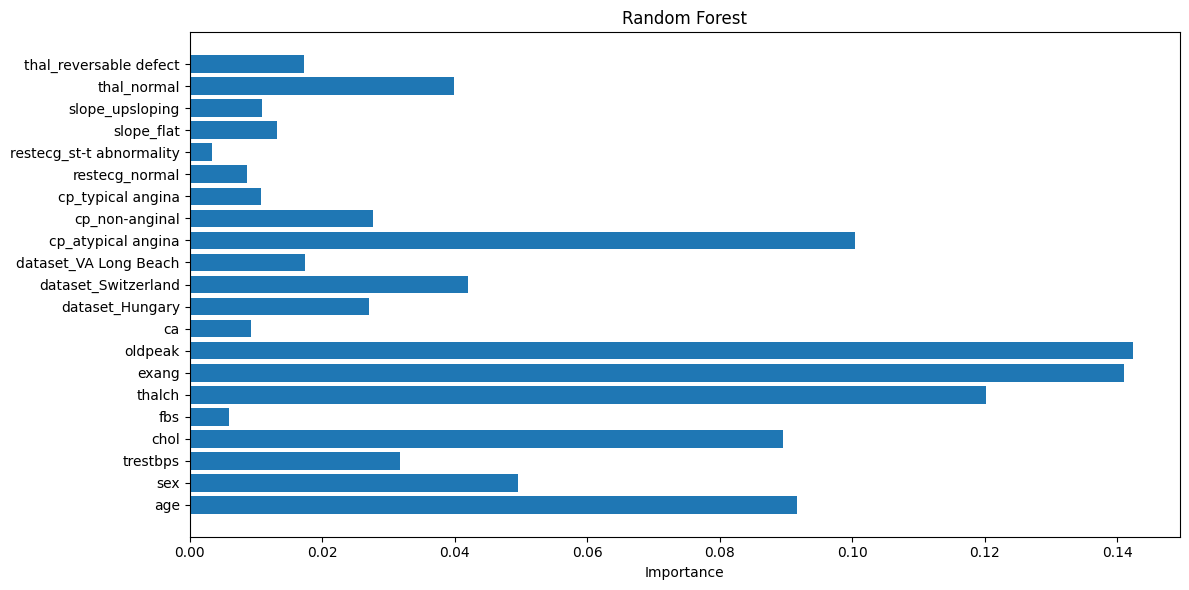

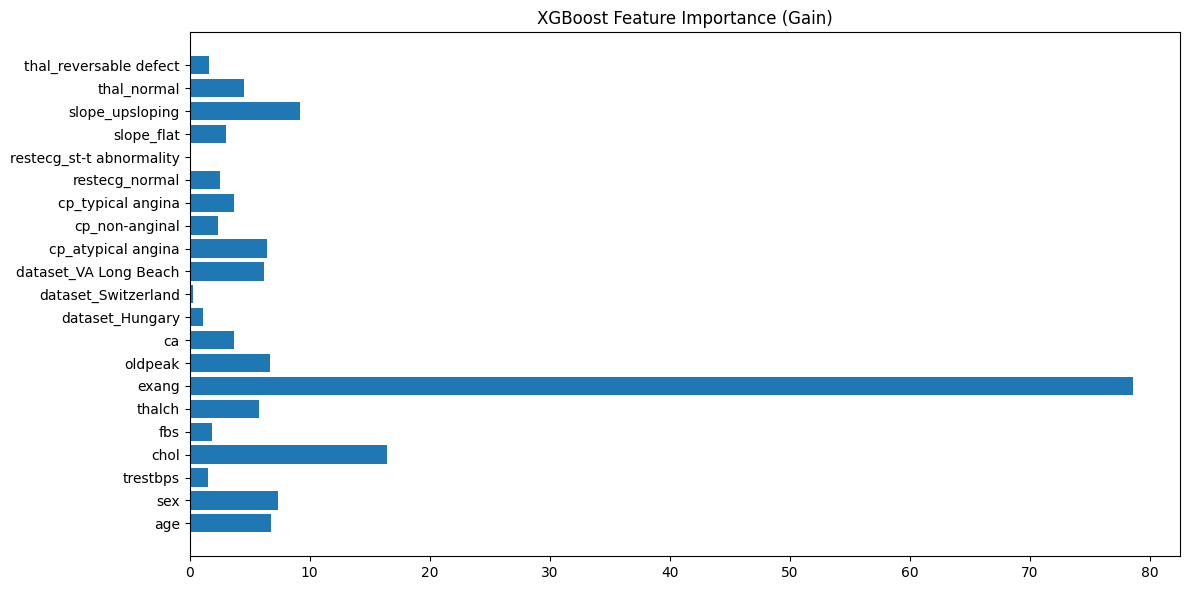

In [39]:
for i in range(4):
    models[i].plot_feature_importance()

In [40]:
patient_info = [37, "Male", "Cleveland", "non-anginal", 130.0, 250.0, False, "normal", 187.0, False, 3.5, "downsloping", 0.0, "normal", 0]

patient_info_df = preprocessor.preprocess_new_patient(
                new_patient_data=patient_info,
                processed_df=processed_data
            )

# Giả sử best_model là model đã huấn luyện
prediction = best_model.predict(patient_info_df)[0]  # Lấy giá trị đầu tiên
proba = best_model.predict_proba(patient_info_df)[0]  # Lấy mảng xác suất đầu tiên

# Nếu y_bin = 0/1 với 1 = có bệnh, 0 = không bệnh
labels = {0: "Không bệnh", 1: "Có bệnh"}

print(f"Dự đoán: {labels[prediction]}")
print(f"Xác suất dự đoán: Không bệnh = {proba[0]:.2f}, Có bệnh = {proba[1]:.2f}")

2025-12-10 00:12:17 - Script.DP - INFO - Bắt đầu preprocess bệnh nhân mới: (1, 15)
2025-12-10 00:12:17 - Script.DP - INFO - Label encoded 'sex'
2025-12-10 00:12:17 - Script.DP - INFO - OneHot encoded 'dataset'
2025-12-10 00:12:17 - Script.DP - INFO - OneHot encoded 'cp'
2025-12-10 00:12:17 - Script.DP - INFO - Label encoded 'fbs'
2025-12-10 00:12:17 - Script.DP - INFO - OneHot encoded 'restecg'
2025-12-10 00:12:17 - Script.DP - INFO - Label encoded 'exang'
2025-12-10 00:12:17 - Script.DP - INFO - OneHot encoded 'slope'
2025-12-10 00:12:17 - Script.DP - INFO - OneHot encoded 'thal'
2025-12-10 00:12:17 - Script.DP - INFO - Scaled 'age'
2025-12-10 00:12:17 - Script.DP - INFO - Scaled 'sex'
2025-12-10 00:12:17 - Script.DP - INFO - Scaled 'trestbps'
2025-12-10 00:12:17 - Script.DP - INFO - Scaled 'chol'
2025-12-10 00:12:17 - Script.DP - INFO - Scaled 'fbs'
2025-12-10 00:12:17 - Script.DP - INFO - Scaled 'thalch'
2025-12-10 00:12:17 - Script.DP - INFO - Scaled 'exang'
2025-12-10 00:12:17 - S

Dự đoán: Không bệnh
Xác suất dự đoán: Không bệnh = 0.69, Có bệnh = 0.31
